# Projeto de regressão (Revisão)

Para um projeto de regressão ou classificação, seguimos o seguinte passo-a-passo:

### 1) Aquisição dos dados/Checagem de formatação
    - Load data
    - Checa as formatações
    - Checa se tem dados faltantes
    - Checa natureza das colunas
### 2) Análise exploratória
    - Checagem mais generalista nas variáveis numéricas e categóricas
    - Início da análise
    - Análise das colunas numéricas
    - Análise das colunas categóricas
    
### 3) Pré-processamento
    - Colocar features numéricas em escala
    - Utilizar label encoder ou OneHotEncoder nas features categóricas
    - Criar pipelines e columns transformers
    - Preparar os dados para o modelo
    - Divisão treino-teste ou treino-teste-validação
### 4) Modelos e Avaliação de modelos
    - Criar modelo trivial
    - Criar modelo baseline
    - Criar modelos para comparar com o baseline
    - Cross-val-score
    - Grid-search 
### 5) Avaliação do modelo escolhido no conjunto de teste
    - Avaliação do desempenho no conjunto de teste
    - Treino com todo o data-set


Após todos esses passos, teremos um projeto de ML completo! (Exceto pelo deploy)

## 1) Aquisição dos dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

In [3]:
# Load data
def load_california_housing():
    return pd.read_csv('housing.csv')

housing = load_california_housing()

In [4]:
housing.head(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY


### Describe (https://www.kaggle.com/datasets/camnugent/california-housing-prices):
#### 1. longitude: A measure of how far west a house is; a higher value is farther west
#### 2. latitude: A measure of how far north a house is; a higher value is farther north
#### 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
#### 4. totalRooms: Total number of rooms within a block
#### 5. totalBedrooms: Total number of bedrooms within a block
#### 6. population: Total number of people residing within a block
#### 7. households: Total number of households, a group of people residing within a home unit, for a block
#### 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
#### 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
#### 10. oceanProximity: Location of the house w.r.t ocean/sea

In [5]:
# Checa formatação ---------------------
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Checa se possui dados faltantes ---------------------
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

*) Note que a coluna total_bedrooms possui 207 dados faltantes! Vamos tratar isso.

Para esse caso, vamos utilizar um SimpleImputer nos dados para cobrir os valores faltantes.

In [7]:
housing['total_bedrooms'].values.reshape(-1, 1)

array([[ 129.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

In [8]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(housing['total_bedrooms'].values.reshape(-1, 1))
housing['total_bedrooms'] = imp_mean.transform(housing['total_bedrooms'].values.reshape(-1, 1))

In [9]:
# Checando novamente
if housing['total_bedrooms'].isna().sum() == 0:
    print("Pronto! Conseguimos imputar a mediana nos valores faltantes.")
else:
    print("Algo parece errado... o.O")

Pronto! Conseguimos imputar a mediana nos valores faltantes.


In [10]:
# Checando novamente a tabela info de dados faltantes:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
# Checa natureza das colunas
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
print('Colunas numéricas (num): ', [c for c in housing.columns if 'ocean_proximity' != c])
print('Colunas categóricas ordinais (cat): ', ['ocean_proximity'])


Colunas numéricas (num):  ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
Colunas categóricas ordinais (cat):  ['ocean_proximity']


Perfeito! Antes de seguir, vamos ver o describe do nosso dataframe:

In [14]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,536.838857,419.391878,1.0000,297.0000,435.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Vamos para as próximas etapas!

## 2) Análise exploratória

Para a análise exploratória vamos checar valor por valor, e para iniciar nossos estudos, vamos visualizar de forma mais generalista com uma tabela de histogramas para as 9 colunas numéricas que temos:

In [15]:
# Regra de bolso para histogramas:
# Pega a raiz do número de amostra para ser o bins_value
bins_value = int(housing.shape[0] ** 0.5)
bins_value

143

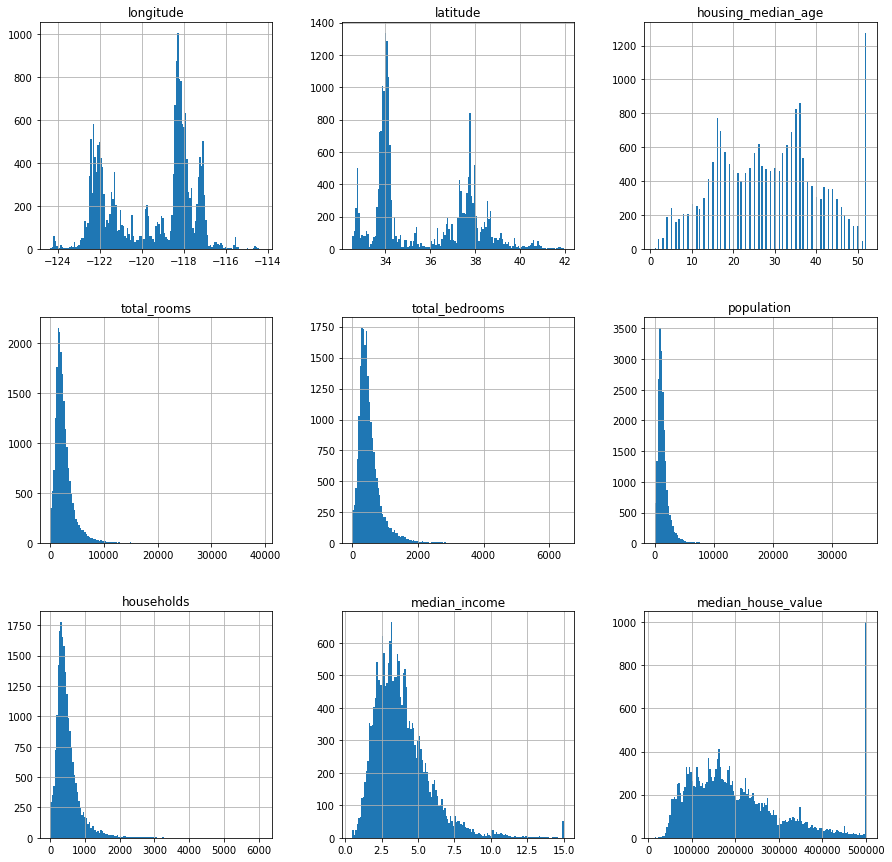

In [17]:
# Checagem mais generalista nas variáveis numéricas
# Tipo 1 - Visualização em histograma
housing.hist(figsize=[15, 15], bins=bins_value);

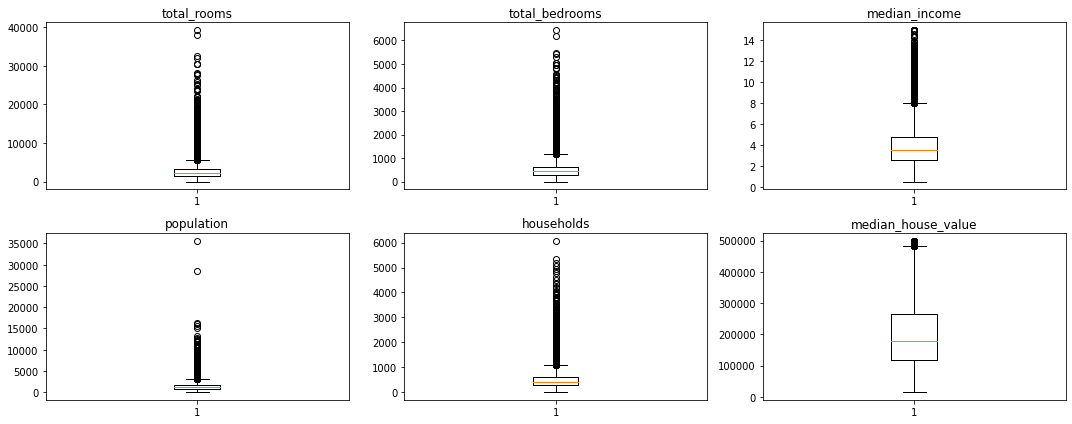

In [18]:
# Checagem mais generalista nas variáveis numéricas
# Tipo 2 - Visualização em Boxplot

# Crie uma figura e uma grade de subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))

# Crie box plots em cada subplot
axes[0, 0].boxplot(housing['total_rooms'])
axes[0, 0].set_title('total_rooms')

axes[0, 1].boxplot(housing['total_bedrooms'])
axes[0, 1].set_title('total_bedrooms')

axes[1, 0].boxplot(housing['population'])
axes[1, 0].set_title('population')

axes[1, 1].boxplot(housing['households'])
axes[1, 1].set_title('households')

axes[0, 2].boxplot(housing['median_income'])
axes[0, 2].set_title('median_income')

axes[1, 2].boxplot(housing['median_house_value'])
axes[1, 2].set_title('median_house_value')

# Ajuste o espaçamento entre subplots
plt.tight_layout()

# Exiba a figura
plt.show()

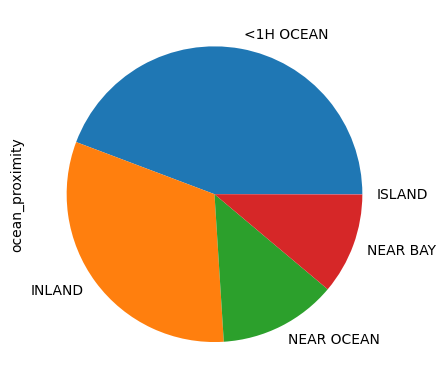

In [17]:
# Checagem mais generalista nas variáveis numéricas
# Tipo 1 - Visualização em pizza
housing['ocean_proximity'].value_counts().plot(kind='pie');

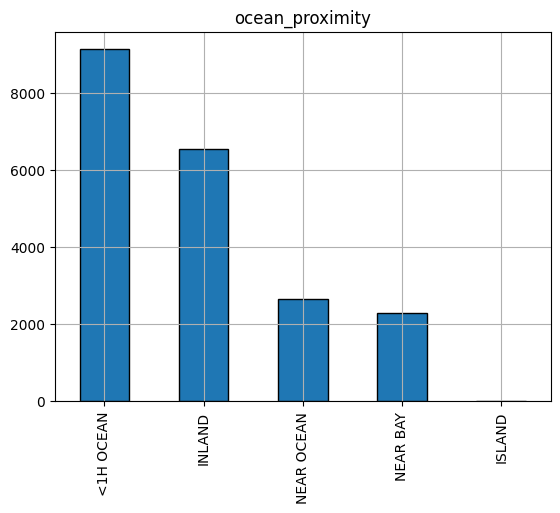

In [18]:
# Checagem mais generalista nas variáveis numéricas
# Tipo 2 - Vsualização em barra
housing['ocean_proximity'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('ocean_proximity')
plt.grid(True)

### Tecendo alguns comentários mais generalistas antes de começar uma análise detalhada:
- Numéricas:
    - histogramas: 
        - total_rooms, total_bedrroms, population, households e median_income aparentam ter assimetria a direita. Isso significa que talvez sejam candidatas a serem aplicadas o np.log
        - median_house_value possui uma saturação no valor de 500_000
        - longitude, latitude são colunas que se referem a posições espaciais, portanto talvez seja interessante plotar em 2D
        - housing_median_age não possui uma forma definida e possui uma saturação no 50
    - Boxplots:
        - Muitos outliers para praticamente todas as colunas numéricas
        - Intuição: Após aplicar o log nas colunas, é provável que a quantidade de outliers diminua
- Categóricas:
    - Barra/pizza:
        - Por só termos 1 coluna categórica, vamos ter somente 1 gráfico em barra/pizza para analisar. Para tanto, é possível ver que, além das classes serem ordinais (é possível enumerar em uma ordem), temos 1 classe que só possui 5 instâncias.


### Início da análise:

Dado os comentários generalistas feitos acima, vamos começar com as colunas [total_rooms, total_bedrooms, population, households e median_income], sobretudo por apresentarem um comportamento de assimetria no histograma acima. Depois seguimos para as outras colunas.


### total_rooms

Significado: Total number of rooms within a block 

*) Note que estamos falando de valor absoluto!


In [19]:
housing['total_rooms'].describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

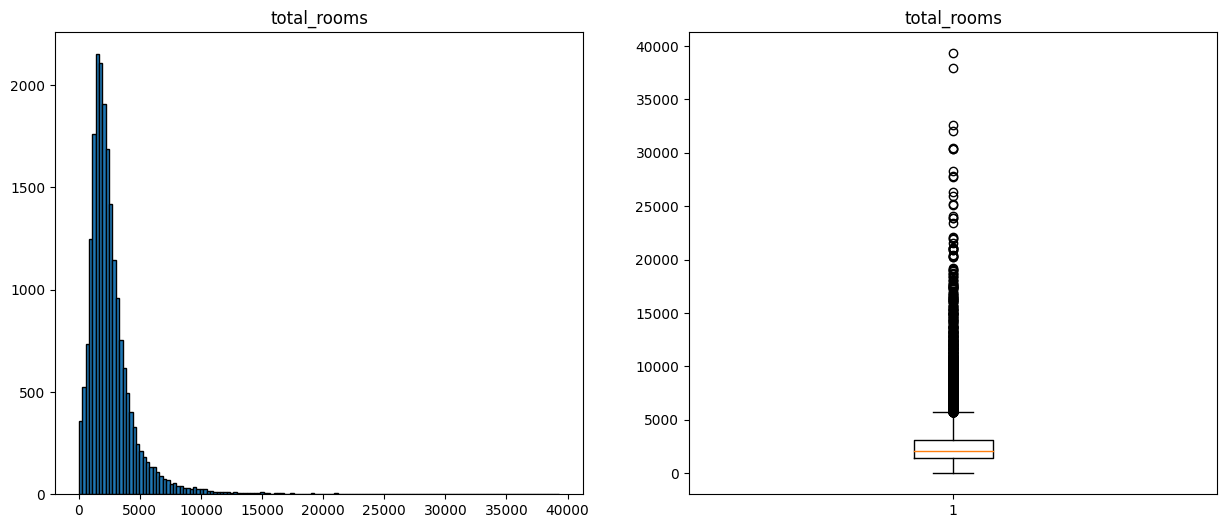

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['total_rooms'], bins=bins_value, edgecolor='black')
axes[0].set_title('total_rooms')

axes[1].boxplot(housing['total_rooms'])
axes[1].set_title('total_rooms');

Vamos tentar aplicar o log e ver como fica o gráfico.

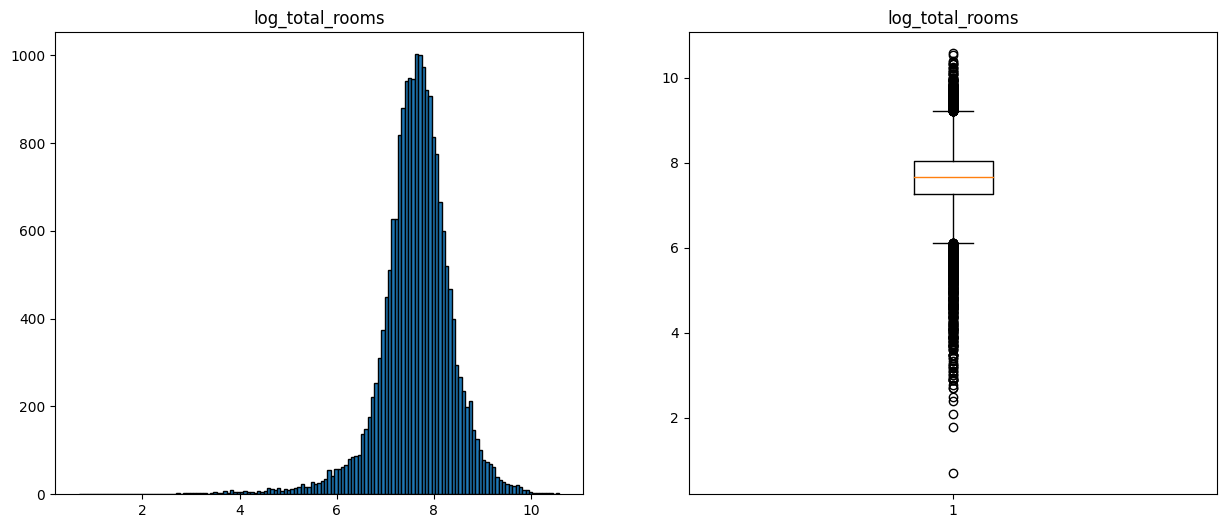

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(housing['total_rooms']), bins=bins_value, edgecolor='black')
axes[0].set_title('log_total_rooms')

axes[1].boxplot(np.log(housing['total_rooms']))
axes[1].set_title('log_total_rooms');

Perfeito, porém, vamos analisar o valor médio da coluna por household:

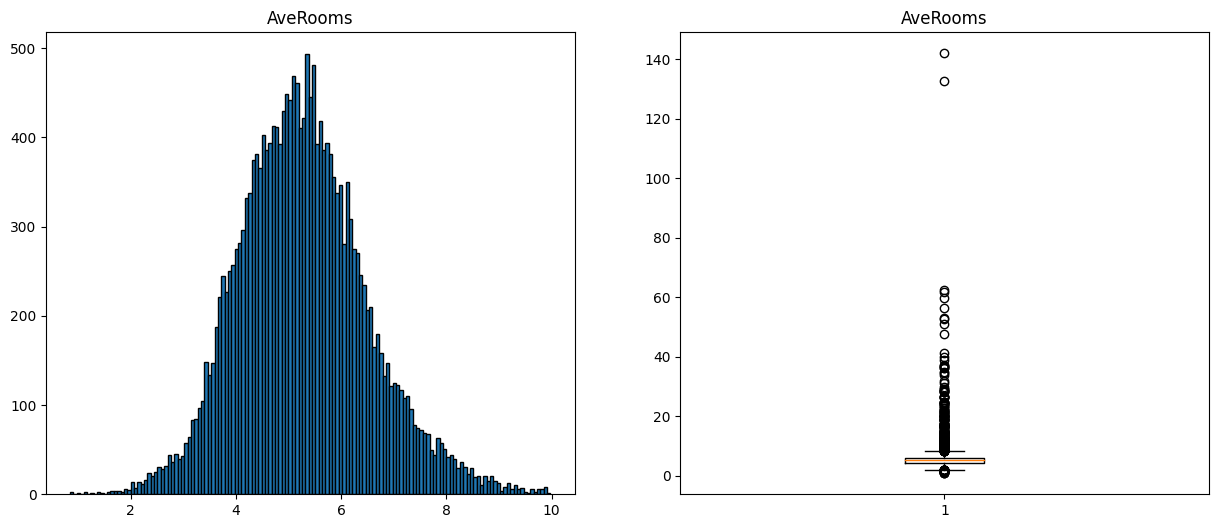

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist((housing['total_rooms'] / housing['households']).where(lambda x: x < 10), bins=bins_value, edgecolor='black')
axes[0].set_title('AveRooms')

axes[1].boxplot(housing['total_rooms'] / housing['households'])
axes[1].set_title('AveRooms');

### Opções:

- temos duas opções: 
    - Aplicar o log no valor absoluto
    - Tirar a média por household (cortando os valores outliers)

Escolha final: Vamos tirar a média e criar uma nova coluna!

In [23]:
housing['AveRooms'] = housing['total_rooms'] / housing['households']

In [24]:
# Validação de corte: 
print('Quantidade de outliers que entrarão no corte: ', housing['AveRooms'].loc[housing['AveRooms'] > 11].shape)
print('É uma quantidade baixa em relação ao todo, portanto podemos cortar.')

Quantidade de outliers que entrarão no corte:  (176,)
É uma quantidade baixa em relação ao todo, portanto podemos cortar.


In [25]:
housing = housing.loc[housing['AveRooms'] < 11]

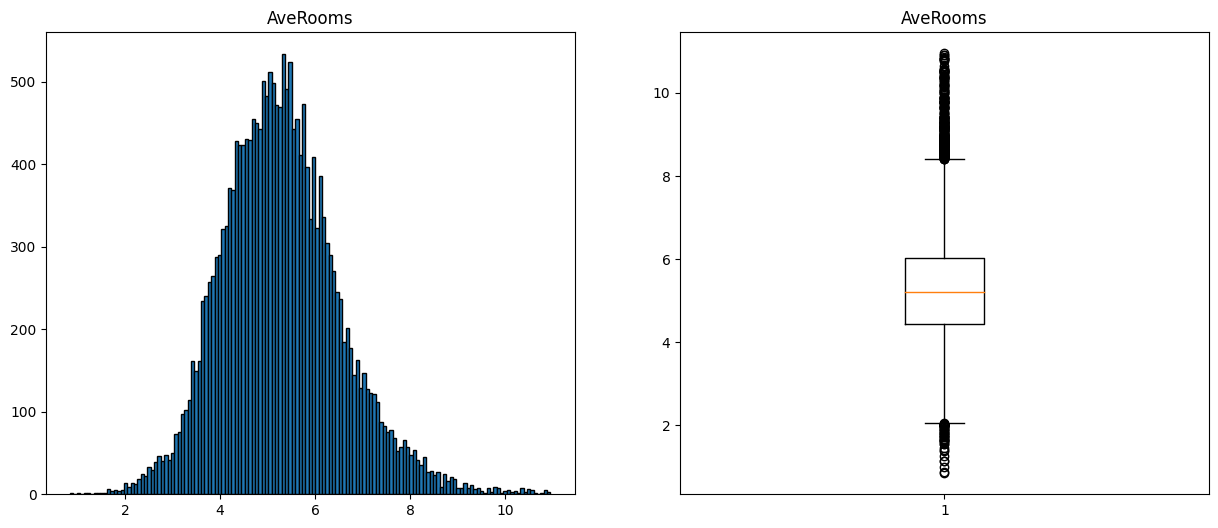

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['AveRooms'], bins=bins_value, edgecolor='black')
axes[0].set_title('AveRooms')

axes[1].boxplot(housing['AveRooms'])
axes[1].set_title('AveRooms');

Perfeito!

### Conclusão:

- Criamos uma nova coluna tal que ela consiste na média de total rooms por households. Em outras palavras, quantidade de rooms por domicílio para cada bloco.
- OBS.: Cortamos alguns outliers! 

----------------------------

### total_bedrooms

totalBedrooms: Total number of bedrooms within a block

Novamente, o mesmo caso anterior, temos valores absolutos.

In [27]:
housing['total_bedrooms'].describe()

count    20463.000000
mean       535.483751
std        417.333783
min          1.000000
25%        297.000000
50%        435.000000
75%        642.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

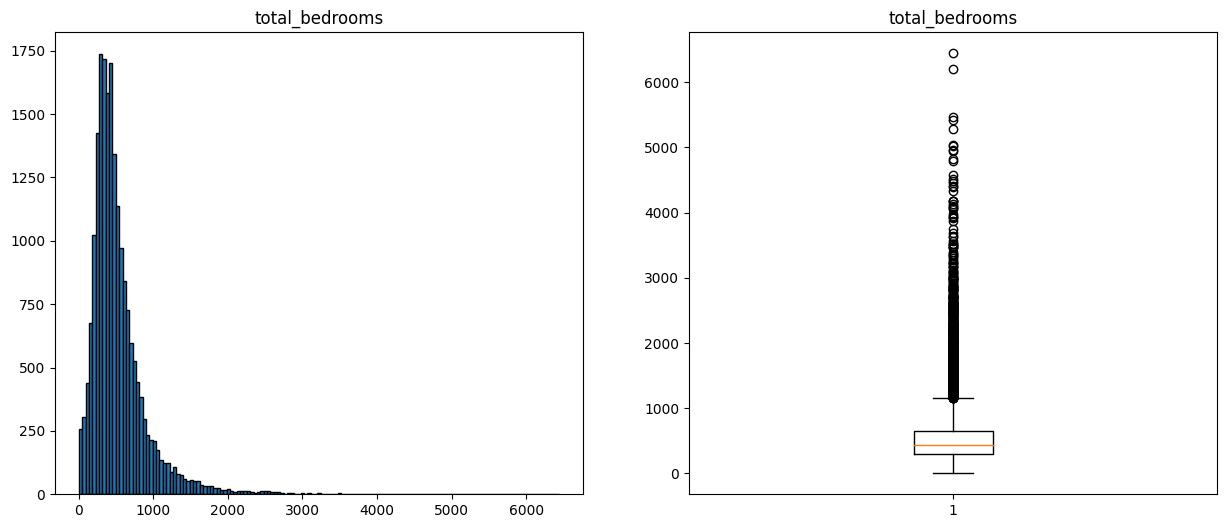

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['total_bedrooms'], bins=bins_value, edgecolor='black')
axes[0].set_title('total_bedrooms')

axes[1].boxplot(housing['total_bedrooms'])
axes[1].set_title('total_bedrooms');

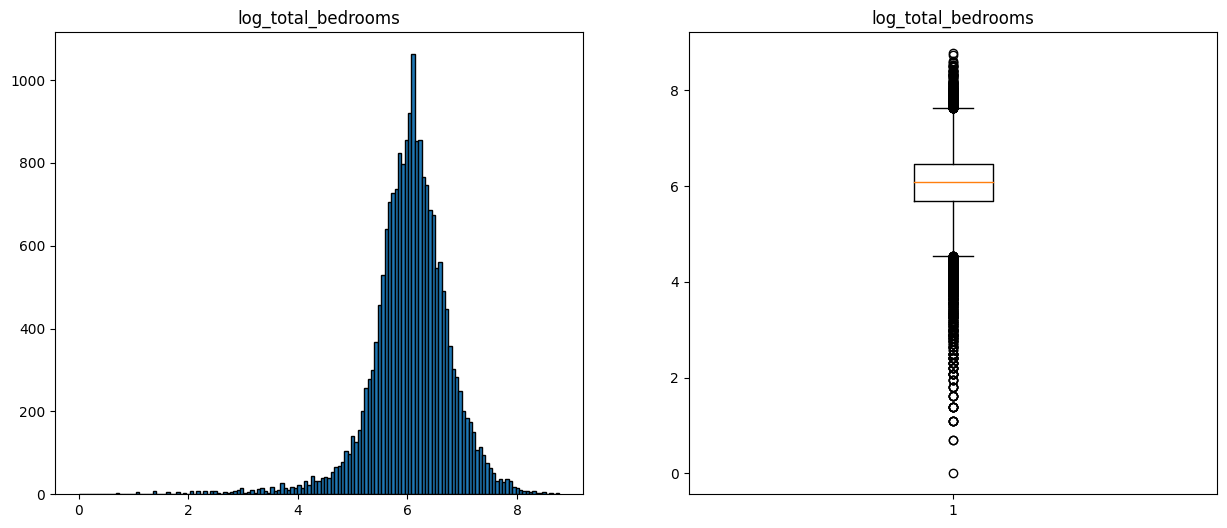

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(housing['total_bedrooms']), bins=bins_value, edgecolor='black')
axes[0].set_title('log_total_bedrooms')

axes[1].boxplot(np.log(housing['total_bedrooms']))
axes[1].set_title('log_total_bedrooms');

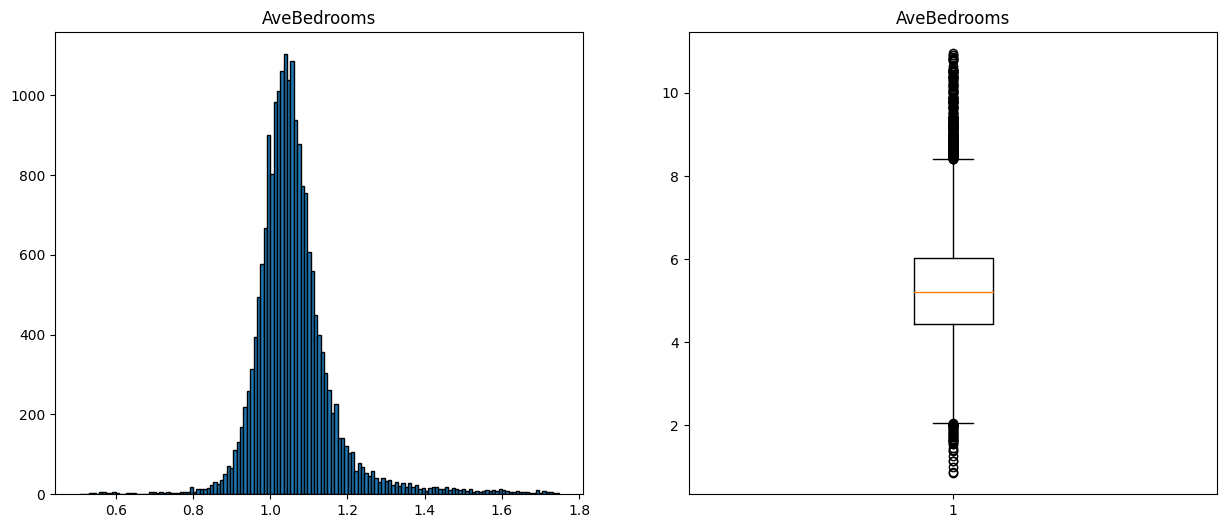

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist((housing['total_bedrooms'] / housing['households']).where(lambda x: x < 1.75).where(lambda x: x > 0.5), bins=bins_value, edgecolor='black')
axes[0].set_title('AveBedrooms')

axes[1].boxplot((housing['total_rooms'] / housing['households']))
axes[1].set_title('AveBedrooms');

### Opções:

- temos duas opções: 
    - Aplicar o log no valor absoluto
    - Tirar a média por household (cortando os valores outliers)

Escolha final: Vamos tirar a média e criar uma nova coluna!

In [31]:
housing['AveBedrooms'] = housing.loc[:, 'total_bedrooms'] / housing.loc[:, 'households']

In [32]:
# Validação de corte: 
print('Quantidade de outliers que entrarão no corte: ', housing['AveBedrooms'].loc[(housing['AveBedrooms'] > 1.75) | (housing['AveBedrooms'] < 0.5)].shape)
print('É uma quantidade baixa em relação ao todo, portanto podemos cortar.')

Quantidade de outliers que entrarão no corte:  (210,)
É uma quantidade baixa em relação ao todo, portanto podemos cortar.


In [33]:
housing = housing.loc[(housing['AveBedrooms'] < 1.75) & (housing['AveBedrooms'] > 0.5)]

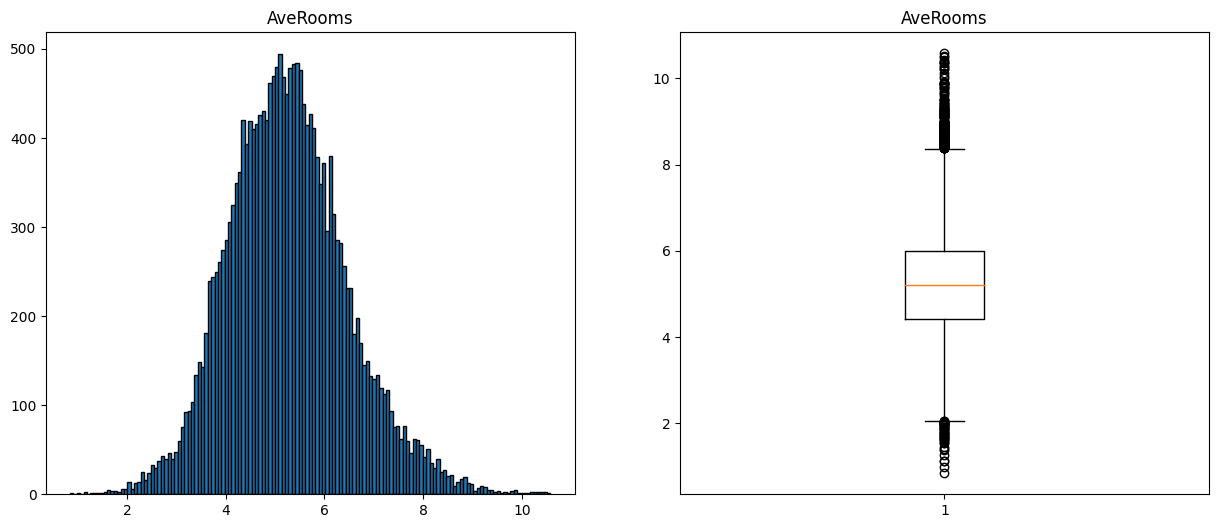

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['AveRooms'], bins=bins_value, edgecolor='black')
axes[0].set_title('AveRooms')

axes[1].boxplot(housing['AveRooms'])
axes[1].set_title('AveRooms');

Perfeito!

-------------

## population

population: Total number of people residing within a block

*) Novamente, vamos dividir pelo household e teremos a quantidade média de pessoas para cada domicílio

In [35]:
housing['population'].describe()

count    20247.000000
mean      1438.257816
std       1131.768076
min          3.000000
25%        801.000000
50%       1176.000000
75%       1734.000000
max      35682.000000
Name: population, dtype: float64

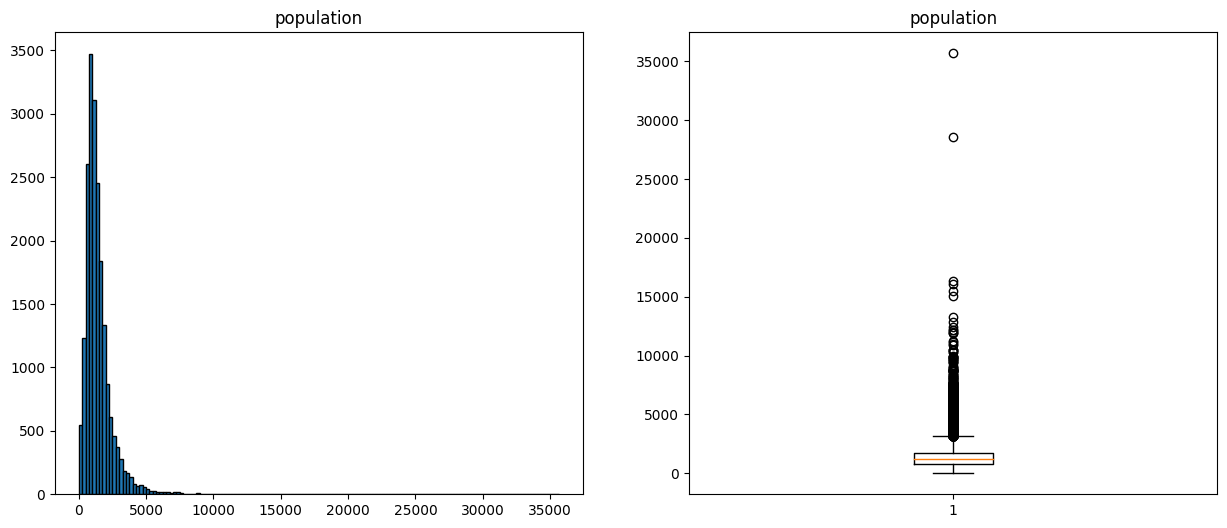

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['population'], bins=bins_value, edgecolor='black')
axes[0].set_title('population')

axes[1].boxplot(housing['population'])
axes[1].set_title('population');

In [37]:
# vamos criar a coluna nova:
housing['AveOccup'] = housing['population'] / housing['households']

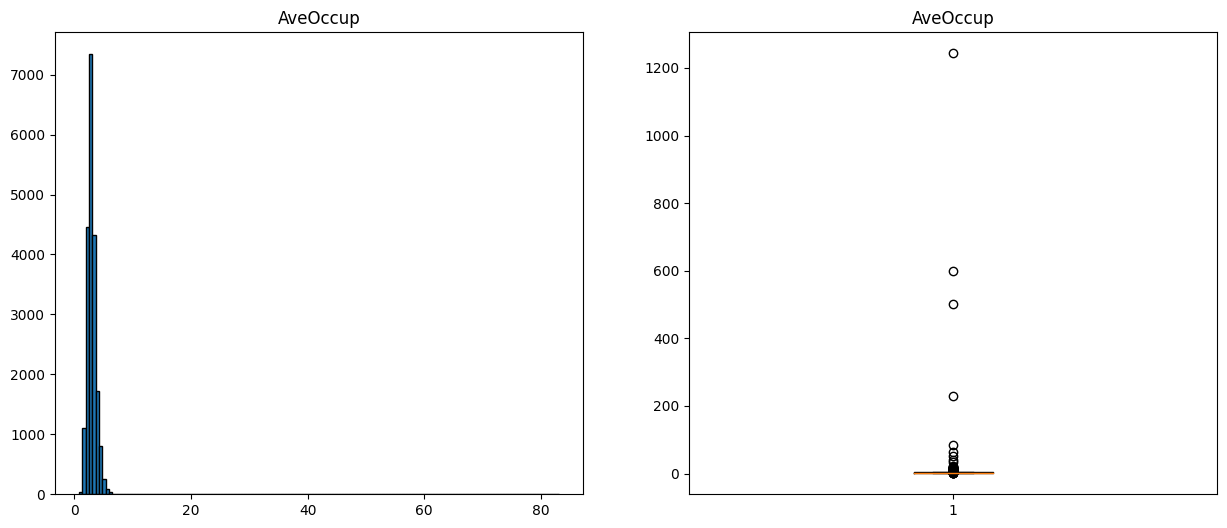

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['AveOccup'].where(lambda x: x < 100), bins=bins_value, edgecolor='black')
axes[0].set_title('AveOccup')

axes[1].boxplot(housing['AveOccup'])
axes[1].set_title('AveOccup');

#### Repare a quantidade de OUTLIERS!!! Vamos verificar o corte nesse ponto:

In [39]:
print('Quantidade de outliers: ', housing['AveOccup'].loc[housing['AveOccup'] > 6].shape)

Quantidade de outliers:  (107,)


## Conclusão:

- Vale a pena cortar esses outliers, novamente eles representam uma pequena parte do todo.

In [40]:
housing = housing.loc[housing['AveOccup'] < 6]

In [41]:
housing.shape

(20139, 13)

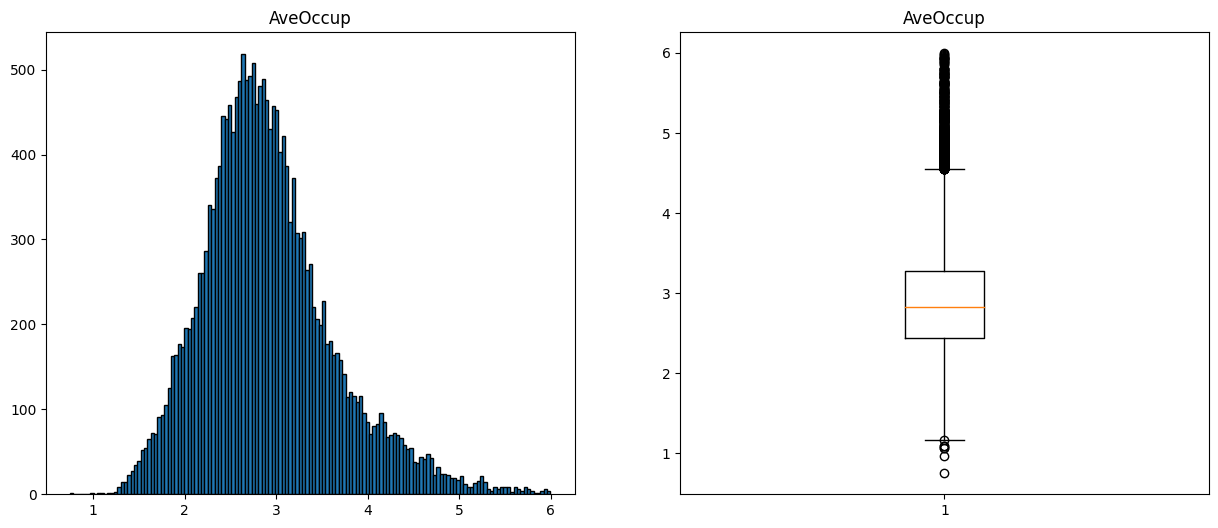

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['AveOccup'], bins=bins_value, edgecolor='black')
axes[0].set_title('AveOccup')

axes[1].boxplot(housing['AveOccup'])
axes[1].set_title('AveOccup');

Perfeito!! Repare como estava o gráfico antes e como está agora! Está bem mais comportado.

-----------

### households

households: Total number of households, a group of people residing within a home unit, for a block

In [43]:
housing['households'].describe()

count    20139.000000
mean       504.539600
std        380.119035
min          2.000000
25%        285.000000
50%        414.000000
75%        608.000000
max       6082.000000
Name: households, dtype: float64

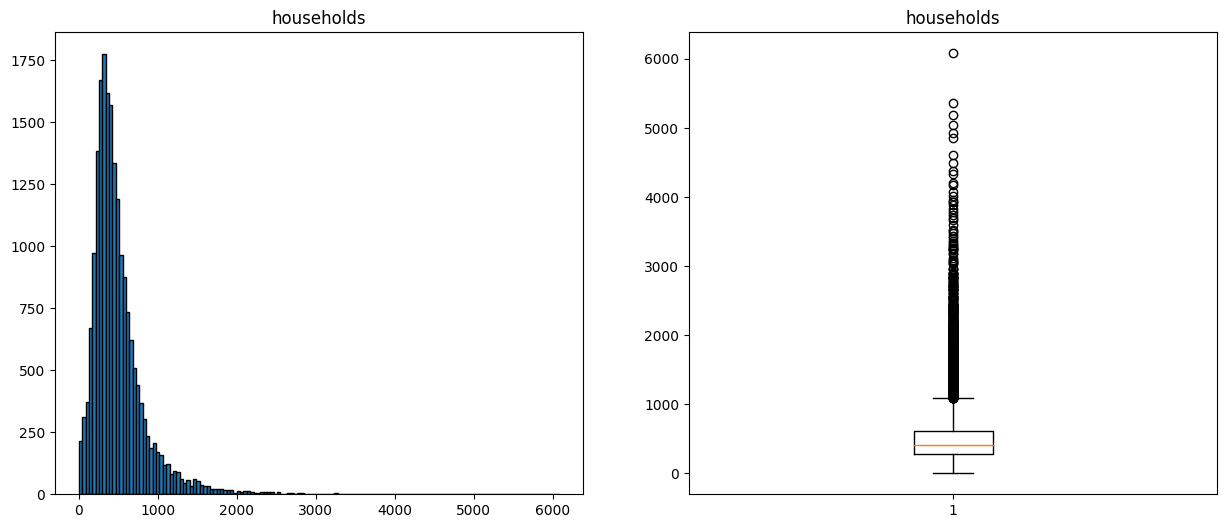

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['households'], bins=bins_value, edgecolor='black')
axes[0].set_title('households')

axes[1].boxplot(housing['households'])
axes[1].set_title('households');

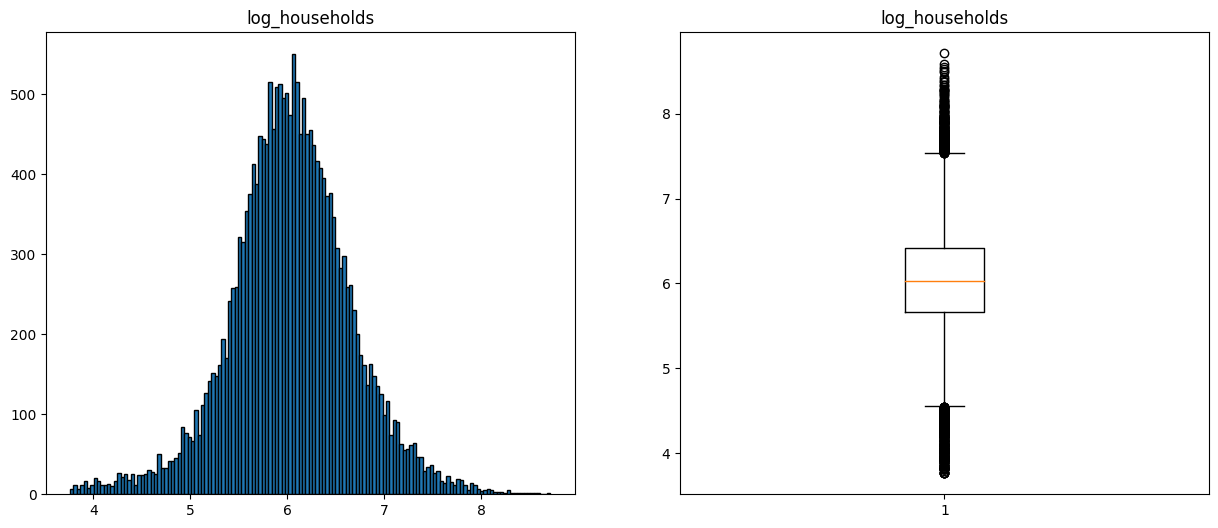

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(housing['households']).where(lambda x: x > 3.75), bins=bins_value, edgecolor='black')
axes[0].set_title('log_households')

axes[1].boxplot(np.log(housing['households']).where(lambda x: x > 3.75).dropna())
axes[1].set_title('log_households');

### Conclusão:

- Vamos aplicar o log na coluna households e cortar os valores outliers

In [46]:
housing['log_households'] = np.log(housing['households'])
housing = housing.loc[housing['log_households'] > 3.75]

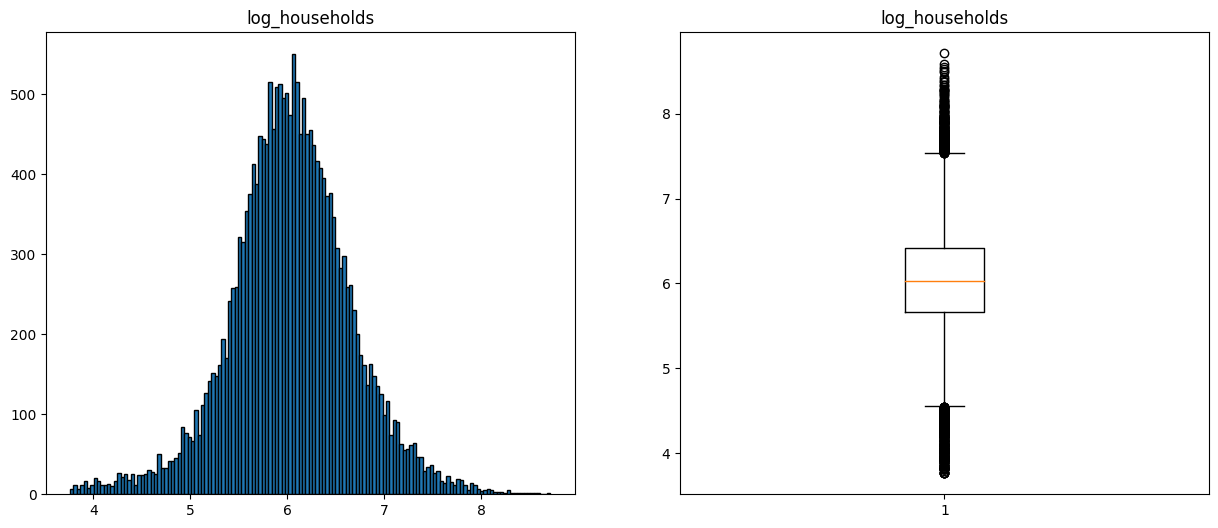

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['log_households'], bins=bins_value, edgecolor='black')
axes[0].set_title('log_households')

axes[1].boxplot(housing['log_households'])
axes[1].set_title('log_households');

Perfeito!! Se aproximando de uma normal.

-------------

### medianIncome

medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

In [48]:
housing['median_income'].describe()

count    19933.000000
mean         3.878816
std          1.880943
min          0.499900
25%          2.572900
50%          3.546900
75%          4.762200
max         15.000100
Name: median_income, dtype: float64

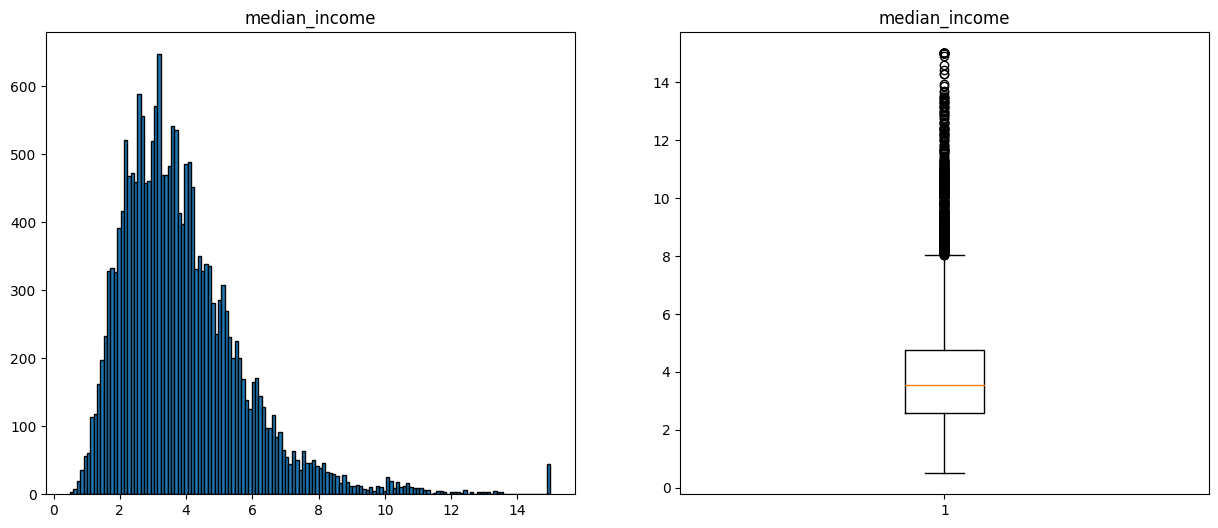

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['median_income'], bins=bins_value, edgecolor='black')
axes[0].set_title('median_income')

axes[1].boxplot(housing['median_income'])
axes[1].set_title('median_income');

Note que temos bastante outliers e uma leve saturação na ponta direita do gráfico. Vamos aplicar o log e tirar alguns outliers

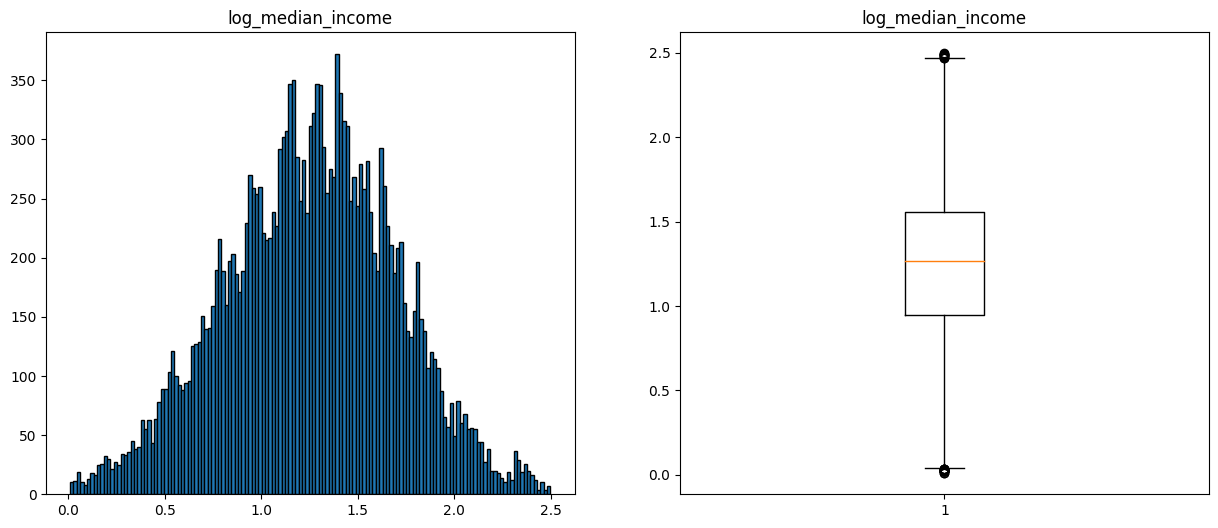

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(housing['median_income']).where(lambda x: (x > 0.0)).where(lambda x: (x < 2.5)).dropna(), bins=bins_value, edgecolor='black')
axes[0].set_title('log_median_income')

axes[1].boxplot(np.log(housing['median_income']).where(lambda x: (x > 0.0)).where(lambda x: (x < 2.5)).dropna())
axes[1].set_title('log_median_income');

In [51]:
housing['log_median_income'] = np.log(housing['median_income'])

In [52]:
# Validação de corte: 
print('Quantidade de outliers que entrarão no corte: ', housing['log_median_income'].loc[(housing['log_median_income'] > 2.5) | (housing['log_median_income'] < 0.0)].shape)
print('É uma quantidade baixa em relação ao todo, portanto podemos cortar.')

Quantidade de outliers que entrarão no corte:  (216,)
É uma quantidade baixa em relação ao todo, portanto podemos cortar.


In [53]:
housing = housing.loc[(housing['log_median_income'] < 2.5) & (housing['log_median_income'] > 0.0)]

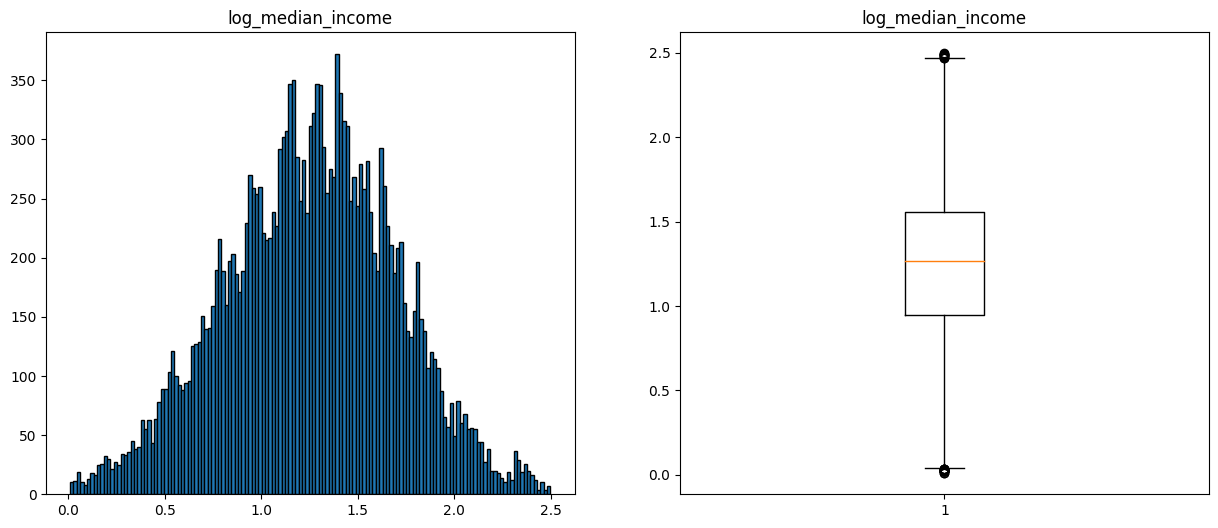

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['log_median_income'], bins=bins_value, edgecolor='black')
axes[0].set_title('log_median_income')

axes[1].boxplot(housing['log_median_income'])
axes[1].set_title('log_median_income');

Bem menos outliers!! 

----------

### housing_median_age

housingMedianAge: Median age of a house within a block; a lower number is a newer building

In [55]:
housing['housing_median_age'].describe()

count    19714.000000
mean        28.705539
std         12.497726
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

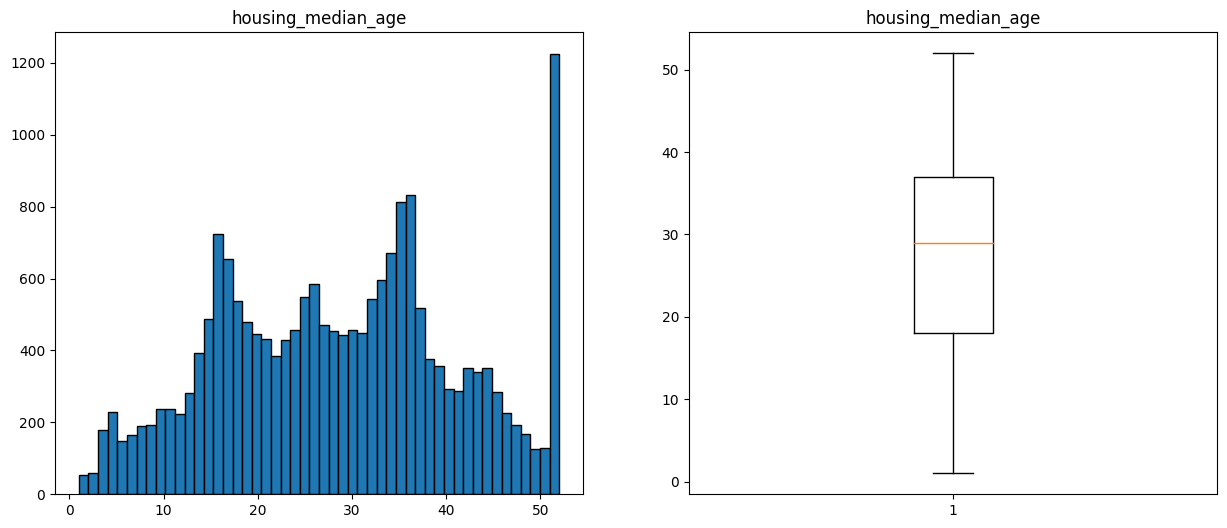

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['housing_median_age'], bins=50, edgecolor='black')
axes[0].set_title('housing_median_age')

axes[1].boxplot(housing['housing_median_age'])
axes[1].set_title('housing_median_age');

Claramente podemos notar a saturação em 52. Muito provavelmente o formulário de perguntas tinha algo do tipo "Imóvel com 52 anos ou mais"...

Vamos avaliar cortar essa saturação:

In [57]:
housing['housing_median_age'].loc[housing['housing_median_age'] == 52]

2        52.0
3        52.0
4        52.0
5        52.0
6        52.0
         ... 
20141    52.0
20142    52.0
20220    52.0
20236    52.0
20237    52.0
Name: housing_median_age, Length: 1176, dtype: float64

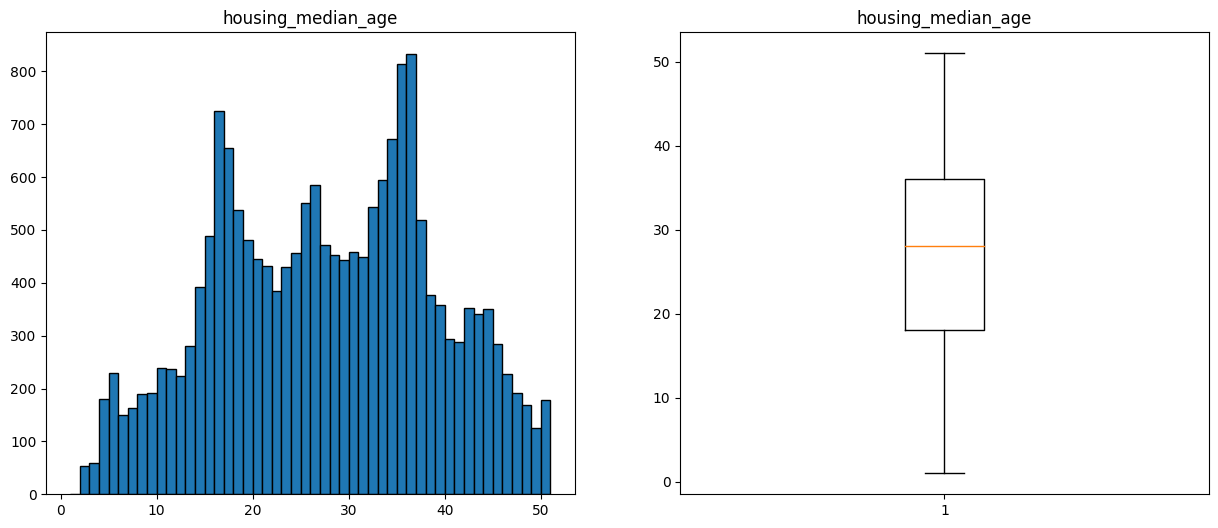

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['housing_median_age'].loc[housing['housing_median_age'] < 52], bins=50, edgecolor='black')
axes[0].set_title('housing_median_age')

axes[1].boxplot(housing['housing_median_age'].loc[housing['housing_median_age'] < 52])
axes[1].set_title('housing_median_age');

### Conclusão:

- Vamos cortar o ponto 52 e construir um modelo com a restrição de: Esse modelo só foi treinado com uma base de imóveis com menos de 52 anos de idade.

In [59]:
housing = housing.loc[housing['housing_median_age'] < 52]

In [60]:
housing.shape

(18538, 15)

---------

## median_house_value (target)

medianHouseValue: Median house value for households within a block (measured in US Dollars)

In [61]:
housing['median_house_value'].describe()

count     18538.000000
mean     202429.959866
std      110722.453899
min       14999.000000
25%      119200.000000
50%      177600.000000
75%      257600.000000
max      500001.000000
Name: median_house_value, dtype: float64

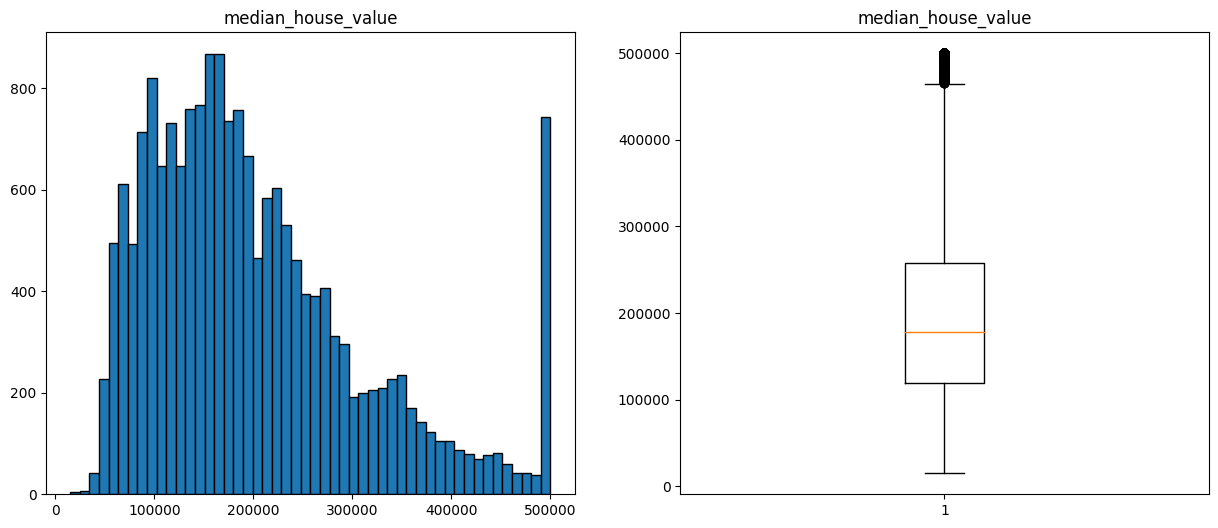

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(housing['median_house_value'], bins=50, edgecolor='black')
axes[0].set_title('median_house_value')

axes[1].boxplot(housing['median_house_value'])
axes[1].set_title('median_house_value');

Note que o target possui uma saturação em 500_000, novamente, podemos resolver essa saturação cortando os pontos de 500_000. Além disso, o gráfico possui uma leve assimetria a direita, indicando talvez a necessidade do log.

Vamos avaliar:

In [63]:
housing['median_house_value'].loc[(housing['median_house_value'] > 500_000) | (housing['median_house_value'] < 60_000)].shape

(1286,)

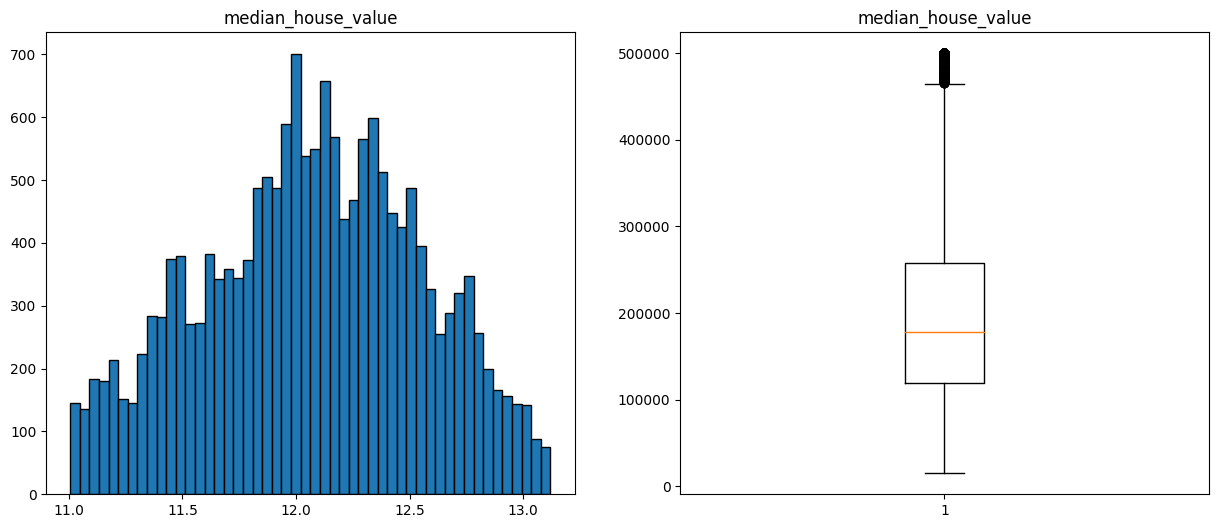

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].hist(np.log(housing['median_house_value'].loc[(housing['median_house_value'] < 500_000) & (housing['median_house_value'] > 60_000)]), bins=50, edgecolor='black')
axes[0].set_title('median_house_value')

axes[1].boxplot(housing['median_house_value'])
axes[1].set_title('median_house_value');

Novamente, uma restrição: Nosso modelo irá se restringir a imóveis que custam mais que 60_000 e menos que 500_000!

In [65]:
housing['log_median_house_value'] = np.log(housing['median_house_value'].loc[(housing['median_house_value'] < 500_000) & (housing['median_house_value'] > 60_000)])

In [66]:
housing = housing.dropna()

------------

## Avaliação espacial (latitude/Longitude) com e sem feature categórica

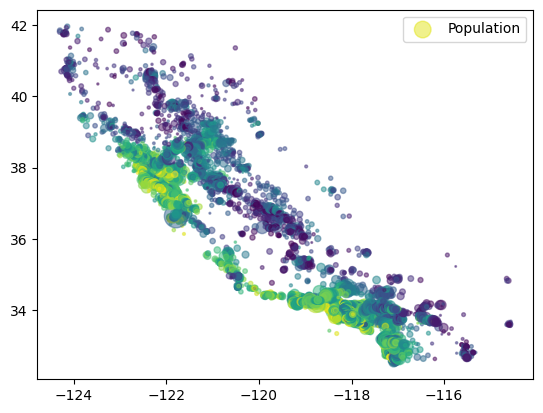

In [67]:
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.5, s=housing['population'] / 100, c=housing['log_median_house_value'], label='Population')
plt.legend()
plt.show()

Note que para esse caso a posição geográfica interfere no valor do imóvel (note também que estamos usando o valor do log). Vamos associar isso à variável categórica

### ocean_proximity

oceanProximity: Location of the house w.r.t ocean/sea

In [68]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     8142
INLAND        5326
NEAR OCEAN    2250
NEAR BAY      1507
ISLAND           2
Name: ocean_proximity, dtype: int64

In [69]:
cats_ocean_proximity = housing['ocean_proximity'].unique()

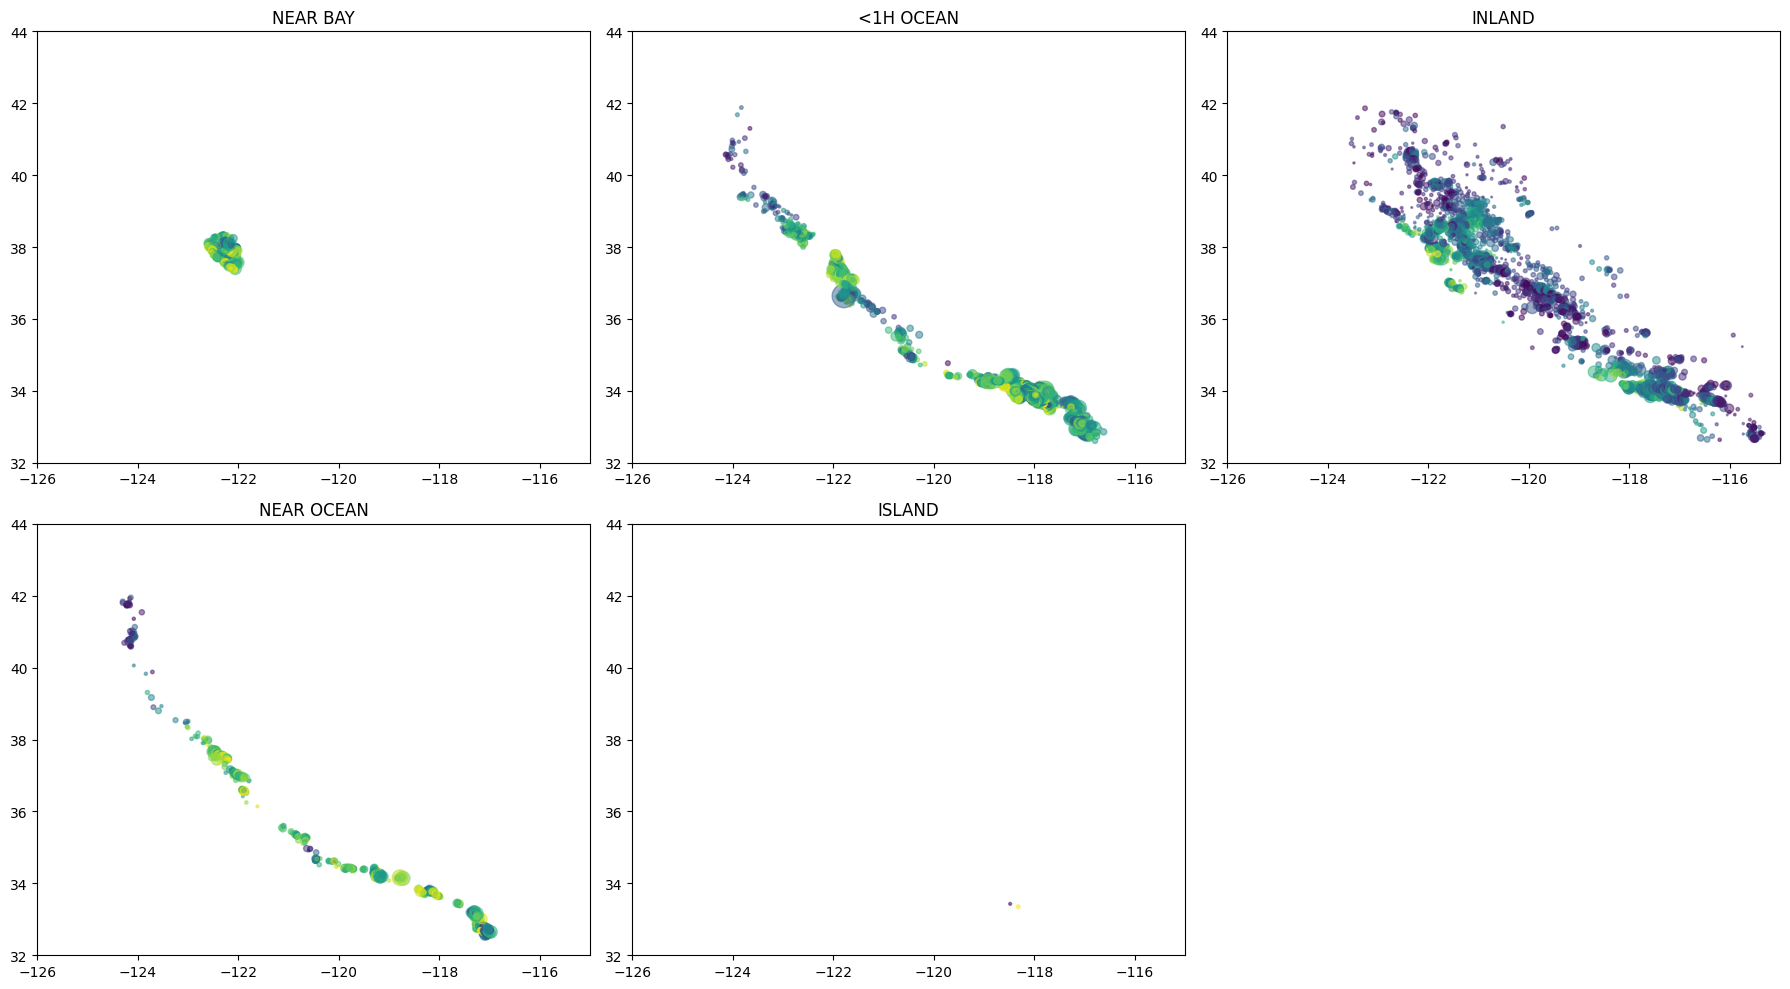

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

m = 0
for i in range(2):
    for j in range(3):
        axes[i, j].scatter(housing['longitude'].loc[housing['ocean_proximity'] == cats_ocean_proximity[m]],
                           housing['latitude'].loc[housing['ocean_proximity'] == cats_ocean_proximity[m]], alpha=0.5, s=housing['population'].loc[housing['ocean_proximity'] == cats_ocean_proximity[m]] / 100, 
                           c=housing['log_median_house_value'].loc[housing['ocean_proximity'] == cats_ocean_proximity[m]], label='Population')
        axes[i, j].set_xlim([-126, -115])
        axes[i, j].set_ylim([32, 44])
        axes[i, j].set_title(f'{cats_ocean_proximity[m]}')
        m += 1
        if m == len(cats_ocean_proximity):
            break
# Oculte o último subplot (2, 2) definindo o eixo como invisível
axes[1, 2].axis('off')

# Ajuste o espaçamento entre subplots
plt.tight_layout()


### Vamos fazer uma clusterização nos valores de latitude, longitude e log_median_house_value

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

# Instancia modelo
model_cluster = KMeans(n_clusters=4)

# Coleta as colunas que fazem mais sentido para o clustering
X_cluster = housing.loc[:, ['latitude', 'longitude', 'median_house_value', 'ocean_proximity']]

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Pipeline de pre preocessamento
pipeline_num = Pipeline([
    ('scaler', MinMaxScaler())
])

pipeline_cat = Pipeline([
    ('encoder', OneHotEncoder())
])


col_transform = ColumnTransformer([
    ("pipe_num", pipeline_num, ['latitude', 'longitude', 'median_house_value']),
    ("pipeline_cat", pipeline_cat, ['ocean_proximity']),
])


In [73]:
X_cluster = col_transform.fit_transform(X_cluster)

In [74]:
model_cluster.fit(X_cluster)

KMeans(n_clusters=4)

In [75]:
y_cluster = model_cluster.fit_predict(X_cluster)

In [76]:
pd.Series(y_cluster).value_counts()

0    8144
2    5326
1    2250
3    1507
dtype: int64

In [77]:
housing['cluster'] = y_cluster

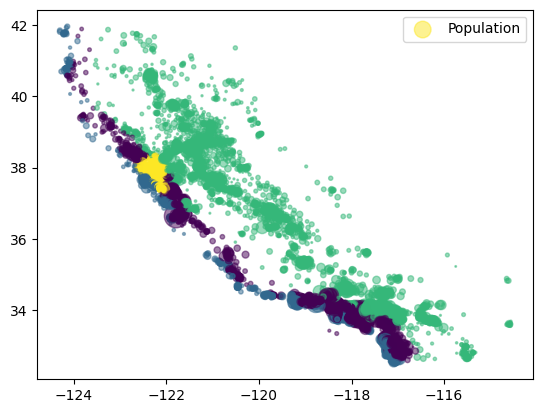

In [78]:
plt.scatter(housing['longitude'], housing['latitude'], alpha=0.5, s=housing['population'] / 100, c=housing['cluster'], label='Population')
plt.legend()
plt.show()

Muito bom! Dá pra ver o clustering funcionou. Separou bem com o valor categórico. A medida com que o imóvel se aproxima da praia, é possível ver que o valor dele aumenta. Resolvemos também o problema da classe com poucas instâncias, vamos observar:

Text(0.5, 1.0, 'ocean_proximity')

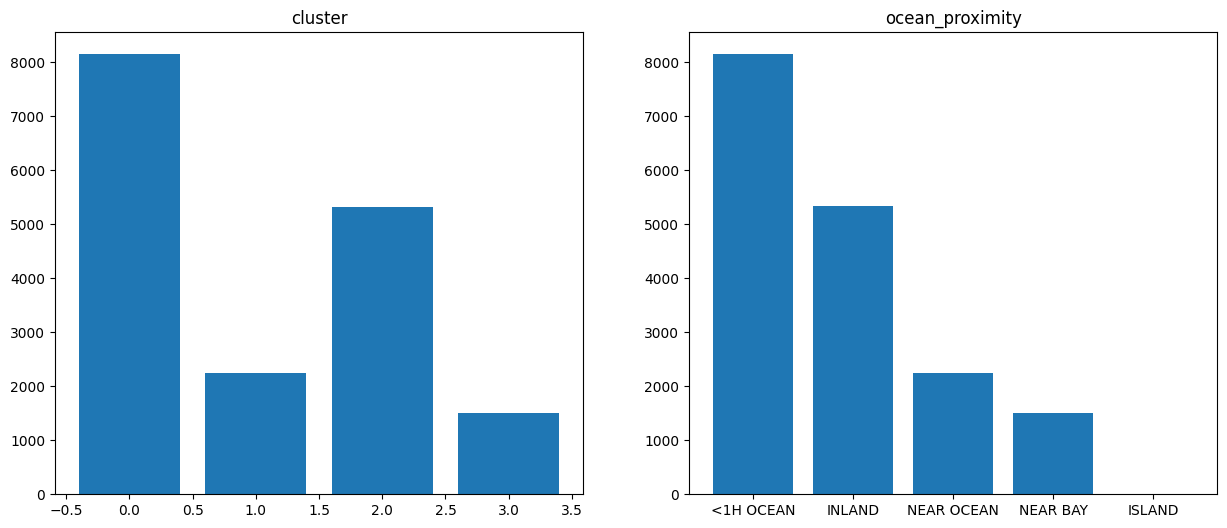

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].bar(housing['cluster'].value_counts().index, housing['cluster'].value_counts().values)
axes[0].set_title('cluster')

axes[1].bar(housing['ocean_proximity'].value_counts().index, housing['ocean_proximity'].value_counts().values)
axes[1].set_title('ocean_proximity')


## Conclusão:

- Conseguimos imbutir características geográficas e monetárias em um valor só categórico utilizando KMeans.
- Vamos utilizar agora a label do cluster no lugar de latitude, longitude e ocean_proximity. 

------------

### Finalmente, vamos ficar só com as features que vamos usar:

In [80]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'AveRooms', 'AveBedrooms',
       'AveOccup', 'log_households', 'log_median_income',
       'log_median_house_value', 'cluster'],
      dtype='object')

In [81]:
features = ['AveRooms', 'AveBedrooms', 'AveOccup', 'log_households', 'log_median_income', 'cluster']
target = ['log_median_house_value']

In [82]:
housing_pre = housing[features + target]

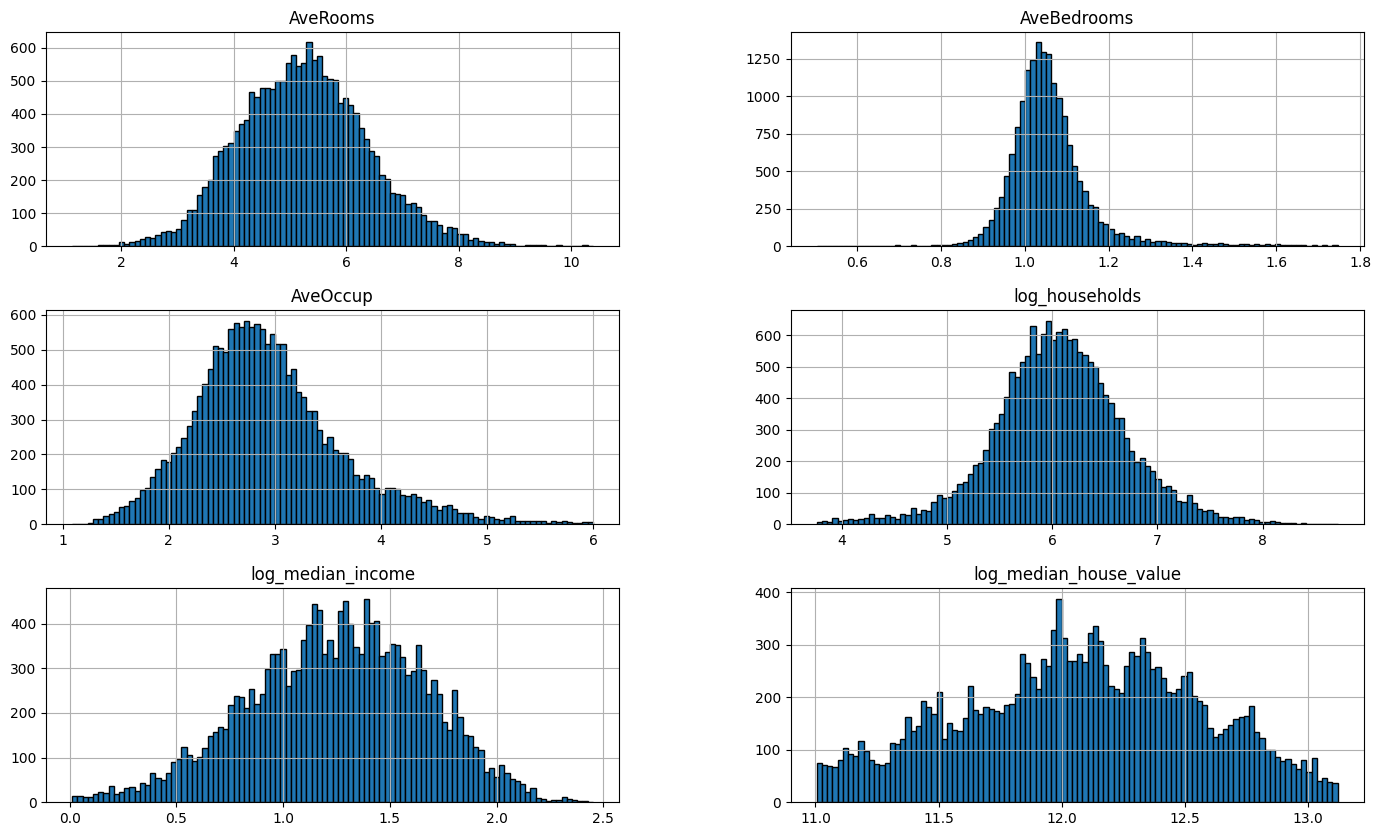

In [83]:
housing_pre[['AveRooms', 'AveBedrooms', 'AveOccup', 'log_households', 'log_median_income'] + target].hist(figsize=[17, 10], bins=100, edgecolor='black');

## 3) Pré-processamento

In [84]:
X_, y = housing_pre[features], housing_pre[target]

In [85]:
# Vamos criar pipelines para tratar os valores abaixo

pipe_num = Pipeline([
    ('Scaler', MinMaxScaler())
])

pipe_cat = Pipeline([
    # Lembre-se de dropar uma das colunas para que a equação X.T @ X tenha inversa!! (Se você usar modelos lineares com regularização aqui não tem problema)
    ('OneHot', OneHotEncoder(drop='first'))
])

c_transform = ColumnTransformer([
    ('pipe_num', pipe_num, ['AveRooms', 'AveBedrooms', 'AveOccup', 'log_households', 'log_median_income']), # 5 colunas
    ('pipe_cat', pipe_cat, ['cluster']) # Após o one hot encoder terá 4 colunas
])

In [86]:
X = c_transform.fit_transform(X_)

In [87]:
X.shape # Teremos 8 colunas no final, pois dropamos a primeira

(17227, 8)

In [88]:
# Separação treino-teste
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Agora esquecemos o Conjunto de Testes por enquanto!

## 4) Modelos 

Vamos selecionar alguns modelos para avaliar!

In [89]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error

class SimpleModel(BaseEstimator, ClassifierMixin):
    
    def __init__(self):
        self.mean = 0
    
    def fit(self, X, y):
        self.mean = y.mean()
        return self

    def predict(self, X):
        return self.mean[0] * np.ones(shape=[X.shape[0], 1])

In [90]:
trivial = SimpleModel() # Trivial
baseline = LinearRegression() # Baseline
lin_reg_ridge = Ridge(alpha=3.0)
dec_tree = DecisionTreeRegressor()
rand_forest = RandomForestRegressor()
models = [trivial, baseline, lin_reg_ridge, dec_tree, rand_forest]
m_names = ['trivial', 'baseline', 'Linear Regression - Ridge', 'Decision Tree', 'Random Forest']

In [91]:
def display_scores(scores):
    print('Scores:', scores.round(decimals=4))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

### Lembrete:

Note que fizemos o nosso modelo para prever o valor do $\ln y$, logo, teremos que nossa métrica será:
$$MSE = \frac{1}{m} \sum (\ln \hat y - \ln y) ^{2}$$
$$MSE = \frac{1}{m} \sum (\ln\frac{\hat y}{y}) ^{2}$$

Portanto, note que otimizamos para minimizar o erro relativo, pelo fato de termos passa o log no target. Dessa forma, vamos tirar a raiz e passar a função np.exp(), para termos o valor do erro médio relativo.


In [92]:
scores = {}
for m_name, model in zip(m_names, models):
    print(f'-----------{m_name}-------------')
    model_scores = cross_val_score(
                        model,  # modelo
                        X_train_full,  # X_train
                        y_train_full,  # y_train
                        scoring='neg_mean_squared_error',  # metrica de interesse
                        cv=10,  # Quantas partições eu quero
                        n_jobs=-1,  # Use todos os cores da maquina!
                    )
    model_rmse_scores = np.exp(np.sqrt(-model_scores)) # RMSE -> Erro médio relativo
    display_scores(model_rmse_scores)
    scores[m_name] = model_rmse_scores
    print('------------------------------------------')

-----------trivial-------------
Scores: [1.6338 1.6015 1.6169 1.6221 1.6213 1.6269 1.6265 1.6342 1.6305 1.6318]
Mean: 1.6245771412002337
Standard deviation: 0.009401198812057136
------------------------------------------
-----------baseline-------------
Scores: [1.3249 1.3438 1.3279 1.3436 1.334  1.34   1.3329 1.3433 1.3472 1.3264]
Mean: 1.3363985079120106
Standard deviation: 0.00779965929848207
------------------------------------------
-----------Linear Regression - Ridge-------------
Scores: [1.3252 1.3437 1.328  1.344  1.3342 1.3399 1.333  1.3433 1.3469 1.3265]
Mean: 1.3364668041264924
Standard deviation: 0.007674118684160956
------------------------------------------
-----------Decision Tree-------------
Scores: [1.4468 1.4739 1.479  1.4773 1.4318 1.4762 1.4548 1.4552 1.472  1.451 ]
Mean: 1.461798744096408
Standard deviation: 0.015263520780215126
------------------------------------------
-----------Random Forest-------------
Scores: [1.2994 1.3194 1.3155 1.3227 1.3155 1.3091 1.31

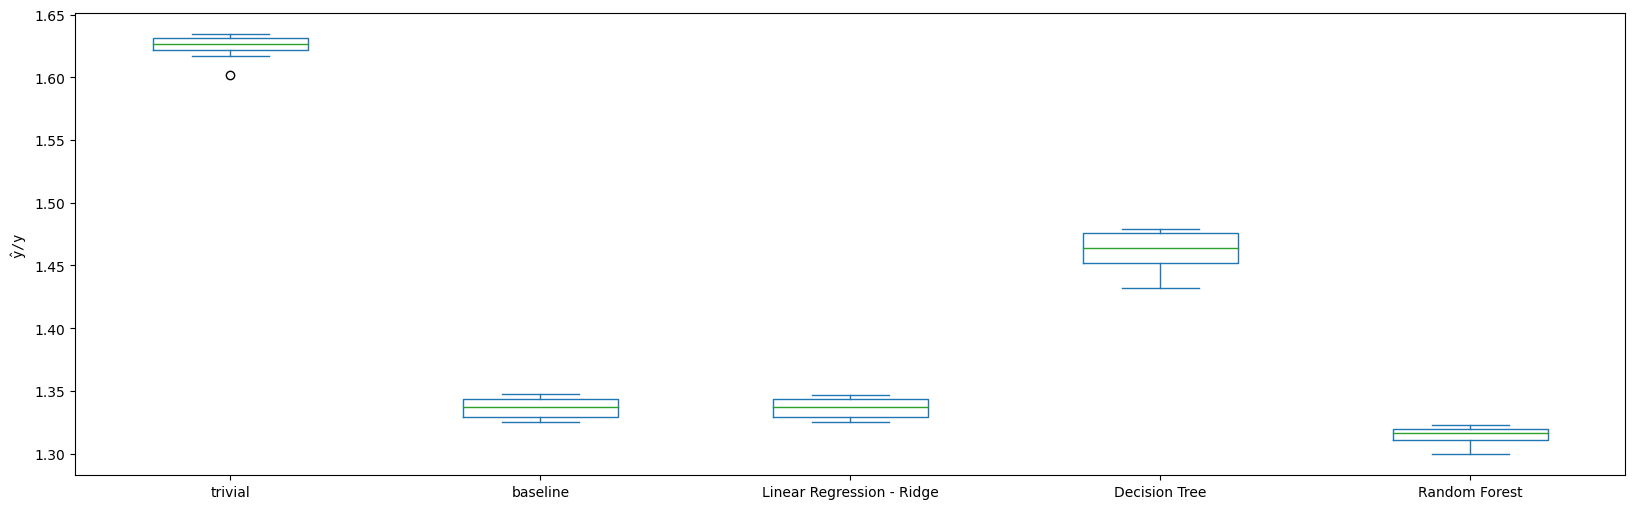

In [93]:
pd.DataFrame(scores).plot.box(
    xlabel='Regressor',
    ylabel=r'$\mathtt{\hat y / y}$',
    figsize=(20, 6),
);

### Note que a Random Forest ganhou do nosso modelo baseline!
Portanto, nosso novo modelo baseline é a random forest. Vamos tunar os seus hiperparâmetros e tentar aumentar seu score.

In [94]:
import time
from sklearn.model_selection import GridSearchCV

RANDOM_SEED=42

param_grid = [
    # try 6 (2×3) combinations of hyperparameters.
    {
        'n_estimators': [10, 30, 45, 100],
        'max_features': [4, 6, 8],
    },
    # then try 4 (1x2×2) combinations with bootstrap set as False.
    {
        'bootstrap': [False],
        'n_estimators': [3, 10],
        'max_features': [3, 4, 5],
    },
]

forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)

# train across 5 folds, that's a total of (6+4)*5=50 rounds of training.
grid_search = GridSearchCV(
    forest_reg,  # Modelo
    param_grid,  # Grid
    cv=10,  # Partições de C.V.
    scoring='neg_mean_squared_error',
    return_train_score=True,
    n_jobs=-1,
)

t1 = time.perf_counter()
grid_search.fit(X_train_full, y_train_full)
t2 = time.perf_counter()

print(f'Tempo gasto: {t2 - t1:.2f} s')

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Tempo gasto: 22.45 s


In [95]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 100}

In [96]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.exp(np.sqrt(-mean_score)), params)

1.3263807780974846 {'max_features': 4, 'n_estimators': 10}
1.3141361869378303 {'max_features': 4, 'n_estimators': 30}
1.312732681593933 {'max_features': 4, 'n_estimators': 45}
1.3098565499321795 {'max_features': 4, 'n_estimators': 100}
1.3268182395344224 {'max_features': 6, 'n_estimators': 10}
1.3165428441772067 {'max_features': 6, 'n_estimators': 30}
1.3147678575706558 {'max_features': 6, 'n_estimators': 45}
1.3130384748645514 {'max_features': 6, 'n_estimators': 100}
1.3283059571751188 {'max_features': 8, 'n_estimators': 10}
1.3175553553159989 {'max_features': 8, 'n_estimators': 30}
1.315812380966463 {'max_features': 8, 'n_estimators': 45}
1.3135694082607219 {'max_features': 8, 'n_estimators': 100}
1.3692048546917797 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.330133068041111 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
1.3688388520453596 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
1.3320881132075317 {'bootstrap': False, 'max_features': 4

In [97]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.11678721, 0.06362895, 0.12694175, 0.06325767, 0.36196351,
       0.00751481, 0.25480828, 0.00509782])

In [98]:
features

['AveRooms',
 'AveBedrooms',
 'AveOccup',
 'log_households',
 'log_median_income',
 'cluster']

## 5) Medir Desempenho Final

Agora vamos utilizar o conjunto de testes para avaliar nosso modelo dentro de um conjunto de instâncias nunca vistas!

In [99]:
X_test

array([[0.60187102, 0.44321658, 0.46345607, ..., 0.        , 0.        ,
        0.        ],
       [0.38772919, 0.34313889, 0.37193976, ..., 1.        , 0.        ,
        0.        ],
       [0.61188928, 0.79762037, 0.27317761, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.49651247, 0.38667186, 0.30462276, ..., 0.        , 0.        ,
        1.        ],
       [0.53836814, 0.39079444, 0.34519441, ..., 0.        , 0.        ,
        0.        ],
       [0.44905987, 0.40906951, 0.56934481, ..., 0.        , 1.        ,
        0.        ]])

In [100]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.exp(np.sqrt(final_mse))

print(f'Erro Médio Relativo (y_hat / y) = {final_rmse}')
print(f'Erro Médio Relativo (delta y_hat / y) = {final_rmse - 1}')

Erro Médio Relativo (y_hat / y) = 1.3065428921837532
Erro Médio Relativo (delta y_hat / y) = 0.3065428921837532


------------

## Tópicos de revisão:

- [X] Machine Learning e sociedade
- [X] Regressão linear
- [X] Validação cruzada para ajuste de hiperparâmetros
- [X] Curva ROC
- [X] Gradient descent
- [X] Sub-ajuste (underfitting) e sobreajuste (overfitting)
- [X] Precision versus recall
- [X] Seleção de variáveis com Lasso

### Cross-Validation

A validação cruzada consiste numa técnica que torna a valiação de um modelo mais justa e confiável. Primeiro fragmentamos nosso conjunto de treino completo em folds como na figura abaixo:

![cross](cross.png)

Para cada rodada de treinamento, usamos os conjunto verdes para treinar o modelo e o vermelho para testar (Conjunto de validação). Dessa forma, teremos um score associado a cada etapa de treinamento, criando uma faixa de valores de scores. Dessa forma conseguimos estabelecer uma média e um desvio padrão para a distribuições de scores do seu modelo. 

Isso torna a avaliação mais confiável pois você garante que o modelo não "espiou" nenhuma instância que está dentro do seu conjunto de teste/validação. 

### Matriz de confusão

![Texto alternativo](./cm.png)

### Metricas de classificação binária

![Texto alternativo](./metricas.png)

### Curva ROC


Para a curva ROC, protamos um gráfico que mostra no eixo y a taxa de verdadeiros positivos (recall ou sensibilidade) e eixo x a taxa de falsos positivos (1 - especificidade). 

$$Sensibilidade = \frac{TP}{TP + FN}$$

$$1 - Especificidade = \frac{FP}{FP + VN}$$

A Curva ROC é criada variando o ponto de corte ou limiar de classificação do modelo. Cada ponto na curva ROC corresponde a um limiar diferente, que determina se um exemplo é classificado como positivo ou negativo com base na probabilidade de classificação calculada pelo modelo

Área Sob a Curva ROC (AUC): A AUC é uma métrica numérica comumente usada para resumir o desempenho geral do modelo de classificação. Quanto maior a AUC, melhor o desempenho do modelo. Uma AUC de 0,5 representa um modelo que faz previsões aleatórias, enquanto uma AUC de 1,0 representa um modelo perfeito.

Uma Curva ROC ideal se aproxima do canto superior esquerdo do gráfico, onde a Sensibilidade é alta e a Especificidade é alta, indicando que o modelo é capaz de distinguir perfeitamente entre classes positivas e negativas.

A Curva ROC é uma ferramenta valiosa para comparar modelos de classificação, escolher o ponto de corte apropriado e entender o equilíbrio entre Sensibilidade e Especificidade em diferentes cenários de aplicação. Quanto maior a AUC, mais eficaz o modelo é na classificação das amostras.


![Texto alternativo](./roc.png)

### Tradeoff precision-recall

Como sabemos, precision e recall são duas métricas de classificação binária que são bastante utilizadas. Nesse sentido, é válido destacar o tradeoff que existe entre elas. Para tanto, vamos analisar suas equações:

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

1) Primeiro ponto é: Sempre é possível alterar a função de decisão do seu modelo e atingir recall = 1. Isso se deve ao fato de que quando sua função de decisão atribui label Positive para todas as instâncias, teremos FN = 0, logo Recall = 1. Em contrapartida, teremos o valor mínimo de precisão. Pois, se deixamos todas as instâncias serem positivas, acertaremos todos os TP, mas erraremos os FP também. Portanto, teremos o mínimo de Precision e máximo de recall.

2) O segundo ponto é que podemos forçar o modelo a ter uma função de decisão com threshold mais alto, o caso extremo seria não rotular ninguém como positivo, fazendo com que o recall seja mínimo, pois TP -> 0 e precision seja próximo de 1 pois FP = 0.

Nesse sentido, teremos um tradeoff. Para cada valor de precision, teremos um recall que participa dessa disputa. Para ilustrar melhor, veja os gráficos abaixo:


![Texto alternativo](./threshold.png)

![Texto alternativo](./tradeoff_precision_recall.png)


Nota: Observa que existe um ponto interessante. Quando eles se igualam, teremos que o valor da média harmônica deles será máxima, em outras palavras, nosso F1 score será máximo!

## O que é o Gradient Descent?
Em primeiro lugar o Gradient Descent é uma técnica que consiste em atingir o mínimo ou máximo de uma determinada função. Nesse sentido, é de suma importância para a área de Machine Learning devido à larga utilização desse método para determinar o mínimo de funções de custo associadas à um determinado modelo. 

## Como funciona o tal método?
Imagine que, de forma simplificada, você esteja um ponto qualquer de uma montanha que você pretende chegar ao topo, porém, você não consegue ver mais do que uma pequena região ao seu entorno. Nesse sentido, se você pretende chegar ao topo, é de se esperar que você busque se guiar pelo caminho de maior crescimento da montanha. Em outras palavras, estamos percorrendo a(o) direção/sentido que possui maior variação de altura para cada passo que damos. Em termos matemáticos, existe uma operação que podemos aplicar à uma função $f(x, y)$ que nos retorna a informação do sentido que devemos seguir para maximizar a variação por unidade de passo: O gradiente de $f(x)$!

$$\vec \nabla f(x, y) = \vec u$$

Ou seja, nos temos agora uma direção para a qual seguir maximizando a variação da função. Nesse sentido, dada uma função $f$ de variáveis $\theta_1$ e $\theta_2$, nós poderemos chegar ao mínimo da função repetindo o seguinte procedimento:

$$\theta^{'} \leftarrow \theta - \alpha \cdot \vec \nabla f(\theta_1, \theta_2)$$

Note que o hiper-parâmetro $\alpha$ (conhecido como Learning Rate) será o tamanho do passo de atualização do vetor $\vec \theta$.

Geometricamente, o que ocorrerá será parecido com a figura abaixo:

![GD](./GD.jpeg "GD")

## Underfitting

O efeito de Underfitting ocorre quando, ao treinarmos um modelo, sua acurácia se mostra baixa no conjunto de treinamento e baixa no conjunto de teste. Nesse sentido, o ocorrido normalmente está vinculado à quantidade insuficiente de dados de treinamento ou inconsistências do modelo adotado (que pode ser simples demais para uma regra arbitrariamente mais complexa). Possíveis soluções: Injetar mais dados para o treinamento do modelo ou construção de um modelo mais adequado para o referido caso. 


## Overfitting

O efeito de Overfitting ocorre quando, ao treinarmos um modelo, sua acurácia se mostra alta no conjunto de treinamento e baixa no conjunto de teste com uma variância alta no erro de teste. Isso se deve, sobretudo, ao fato do modelo se ajustar demais aos dados de treinamento e não ser capaz de promover generalizações. Isso pode ocorrer devido a alta complexidade do modelo adotado. 


## Balanced

Por fim, vamos considerar o caso em que chegamos num regressor muito próximo do ótimo. Nesse sentido, temos um modelo que generaliza bem os casos e possui erro de treino e teste parecidos. Isso pode ser alcançado com um modelo adequado e um dataset de tamanho razoável para tal tarefa.

## Graficamente

Portanto, acompanhe uma figura que ilustra cada caso citado acima:

![over_under_balanced](over_under_balanced.png)

## O que é uma Regressão Linear?

Em suma, uma regressão linear é um modelo que, quando restrito ao caso particular de 2 dimensões, recai numa função afim, ou seja, do tipo $f(x) = ax + b$. Generalizando o modelo para mais dimensões, teremos a seguinte equação:

$$f(x_0, x_1, ..., x_n) = 1 \cdot x_0 + \theta_1 \cdot x_1 + ... + \theta_n \cdot x_n$$

O nosso conjunto de entrada será o vetor de atributos $\vec X = (x_0, x_1, ..., x_n)$, e o nosso vetor de parâmetros será $\vec \theta = (\theta_1, \theta_2, ..., \theta_n)$. de maneira simplificada, podemos escrever nossa função de regressão como sendo:

$$ f(\vec X) = \vec X \cdot \vec \theta$$

Por fim, dado que construimos nosso modelo, como podemos aplicar ele em um caso da vida real?

## Como podemos aplicar o modelo?

Note que, uma vez que para um determinado caso você tenha os valores dos parâmetros $\vec \theta$ definidos, é possível prever o valor de $f$ para uma instância de entrada $\vec{X^{(i)}}$. Isso pode ser muito útil no quesito de que podemos realizar predições de valores, dado conhecemos o vetor de entrada $\vec{X^{(i)}}$ e vetor de parâmetros $\vec \theta$ (fixos). 

Porém, e se não tivermos os valores do vetor de parâmetros? Como podemos determina-los?

## Como determinar os parâmetros do modelo?

Uma vez que temos um modelo construido, precisamos pensar em como determinar os valores dos parâmetros do nosso modelo. Para tanto, precisamos associar o modelo à uma função de custo. Isso se deve ao fato de que, uma vez que tenhamos um conjunto de dados, é possível determinar nossos parâmetros ao minimizar a nossa função de custo! 

Para o modelo de Regressão Linear, utilizaremos a função de custo como sendo o $MSE(\vec \theta)$. Por fim, para determinar os parâmetros, podemos seguir caminhos diversos, dois deles são: utilizar um método que citamos acima (Gradient Descent) ou podemos utilizar uma fórmula fechada para determinar o vetor $\hat \theta$ de parâmetros optimos.

Para a fórmula fechada, é possível deduzir que o vetor será dado por:

$$\hat \theta= (X^{T}X)^{-1} X^{T}y$$

Onde o $X$ acima é uma matriz com $m$ instâncias. Note que esse caso pode possuir problemas de convergência quando duas features são colineares, pois isso implicaria que:

$$det(X^{T}X) = 0 \Longleftrightarrow \nexists ~ (X^{T}X)^{-1}$$

Para tanto, uma solução para o problema acima pode ser: Regularizações na função de custo para escapar do problema de não existir a matriz inversa

## O que é Machine Learning?

Em primeiro lugar, é imprescindível que conceituemos o que é Machine Learning. Uma das definições mais famosas é uma de Arthur Samuel, cientista da computação e pioneiro na área de Inteligência Artificial: Machine Learning é a capacidade de dar ao computador a habilidade de realizar uma tarefa sem ele ser explicitamente programado para isso. Nesse aspecto, duas das tarefas mais utilizadas são: Classificação e Regressão. 

## No que isso impacta a sociedade?

Como visto na seção anterior, é possível realizar tarefas que auxiliam os humanos a tomarem decisões. Dentre elas, duas das mais comuns são: Regressão e Classificação. Em um contexto econômico, é possível utilizar modelos preditivos para determinar possíveis valores de ações no futuro (Tarefa de Regressão), dado um conjunto de features (features são valores que podemos utilizar para prever o preço final da ação). 

Além disso, ainda na área econômica, é possível utilizar modelos de classificação para determinar se um investimento hipotético pode trazer risco ou não para o patrimônio de um determinado investidor. Para tanto, é preciso treinar um modelo para reconhecer tais características. 

Vale ressaltar, novamente, que as tarefas de regressão e classificação são realizadas sem serem explicitamente programadas para tal. Em outras palavras, o modelo aprende a inferir um target de acordo com as regras implicitamente inerentes aos dados fornecidos ao modelo.


## Como funcionam as regularizações Lasso e Ridge?

Para ambos os casos, adicionamos um termo à função de custo. Em suma, isso pode ajudar o modelo a convergir (principalmente quando o modelo é linear e existem features colineares) e evitar que o modelo sofra de overfitting (sobre ajuste ao conjunto de treinamento).

Ambas as equações estão registradas abaixo. Note que elas introduzem um tempo que penaliza valores de $\beta$ mais altos (onde $\beta$ são os parâmetros do modelo).

$$L_{\text{Lasso}}(\beta) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j|$$

$$L_{\text{Ridge}}(\beta) = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2$$


É possível notar que, utilizando a técnica dos multiplicadores de La Grange, nosso problema se resume à minimizar o MSE sujeito a uma restrição. Que geometricamente pode ser interpretada abaixo:


![Regularizações](lasso_ridge.png)


Note que para a regularização Lasso, o formato de diamante faz com que o ponto de mínimo se deposite nas pontas. Isso faz com que os valores de parâmetros "inúteis" acabem zerando e gerando uma matriz esparça de solução, contendo somente as features mais importantes.

## Extra:

Otimizador Lin Reg baseado em gradiente

In [115]:
m = 100

X = 2 * np.random.rand(m, 1)  # Gera m pontos aleatórios entre 0 e 2.
ruido = np.random.randn(m, 1)  # Gera um ruido gaussiano de desvio padrão 1.0

y = 4 + 3 * X + ruido  # Nosso sinal detectado.

In [140]:
theta_0 = np.array([[0.0],
                    [0.0]])

X_1s = np.ones_like(X)
X_ = np.append(X_1s, X, axis=1)

def gradient_MSE(X, theta, y):
    return (1 / X.shape[0]) * 2 * X.T @ (X @ theta - y)

def optimizer(X, theta_0, y):
    m = X.shape[0]
    theta = theta_0.copy()
    eta = 0.03
    
    i = 0
    done = False
    while not done:
        theta_ = theta - eta * gradient_MSE(X, theta, y)
        
        if np.linalg.norm(theta_ - theta) < 0.000001:
            done = True
            print('Done')
        
        if i >= 5_000:
            done = True
            print('Max iter')
        
        theta = theta_
        i += 1
    print(i)
    return theta_

In [139]:
optimizer(X_, theta_0, y)

Done
1537


array([[3.89482862],
       [3.07573302]])